# DMC 2013 EDA & Solution

## Kelompok 4

1. Faisal Nur Qolbi (2311399)
2. Datuk Daneswara Raditya Samsura (2308224)
3. Elsa Nurjanah (2306026)
4. Daffa Faiz Restu Oktavian (2309013)
5. Safira Aliyah Azmi (2309209)

## **Pendahuluan**

### Scenario

Pada tugas ini, kami melakukan analisis terhadap data sesi pengunjung pada Data Mining Cup 2013, yang berfokus pada pengembangan model prediksi untuk mengetahui apakah seorang pengunjung akan melakukan pembelian atau tidak. Setiap sesi dalam data merepresentasikan kunjungan pengunjung ke situs online shop, di mana mereka dapat melihat produk, menambahkan barang ke keranjang, atau menghapus barang dari keranjang. Di akhir sesi, pengunjung mungkin melakukan pembelian terhadap barang yang ada di keranjang atau membeli barang secara langsung.

### Problem Statement

Tugas ini meminta kami untuk membangun model prediksi menggunakan data sekitar 50.000 sesi pengunjung di online shop, yang mencatat apakah terjadi pembelian atau tidak. Model ini bertujuan memprediksi kemungkinan pembelian berdasarkan aktivitas selama sesi. Setelah selesai, model akan diuji dengan 5.000 sesi tambahan. Prediksi model akan berupa angka antara 0 (tidak ada pembelian) hingga 1 (terjadi pembelian). Semakin akurat prediksinya, semakin baik model tersebut. Model ini dapat digunakan untuk strategi toko, seperti rekomendasi produk atau pemberian kupon berdasarkan potensi pembelian pengunjung.

### Data Understanding

#### Deskripsi data

Dataset yang digunakan dalam tugas ini mencakup data historis sesi pengunjung di sebuah online shop, yang terdiri dari 429,013 record pada file `transact_train.txt` dan 45,068 record pada file `transact_class.txt`, dengan masing-masing record dipisahkan oleh delimiter `|`. Kedua file mencakup kolom-kolom seperti `sessionNo`, `startHour`, `startWeekday`, `duration`, `cCount`, `cMinPrice`, `cMaxPrice`, `cSumPrice`, `bCount`, `bMinPrice`, `bMaxPrice`, `bSumPrice`, `bStep`, `onlineStatus`, `availability`, `customerID`, `maxVal`, `customerScore`, `accountLifetime`, `payments`, `age`, `address`, dan `lastOrder`. Namun, file `transact_train.txt` memiliki kolom tambahan `order` yang menunjukkan hasil akhir dari sesi (apakah terjadi pembelian atau tidak), sementara `transact_class.txt` tidak memiliki kolom ini. Sehingga disimpulkan `transact_train.txt` digunakan untuk train model sedangkan `transact_class.txt` digunakan untuk test model.

#### Penjelasan Atribut

Penjelasan singkat

<table>
    <tr>
        <th> Nama Atribut </th>
        <th> Deskripsi Atribut </th>
        <th> Range dan Tipe Data </th>
        <th> Nullable? </th>
    </tr>
    <tr>
        <td> sessionNo </td>
        <td> Nomor urut dari sesi yang sedang berjalan. </td>
        <td> integer </td>
        <td> N </td>
    </tr>
    <tr>
        <td> startHour </td>
        <td> Jam ketika sesi dimulai. </td>
        <td> integer {0, 1, ..., 23} </td>
        <td> N </td>
    </tr>
    <tr>
        <td> startWeekday </td>
        <td> Hari ketika sesi dimulai (1-Senin, 2-Selasa, ..., 7-Minggu). </td>
        <td> integer {1, 2, ..., 7} </td>
        <td> N </td>
    </tr>
    <tr>
        <td> duration </td>
        <td> Lama sesi dalam detik sejak dimulai. </td>
        <td> float </td>
        <td> N </td>
    </tr>
    <tr>
        <td> cCount </td>
        <td> Jumlah produk yang diklik selama sesi berlangsung. </td>
        <td> integer </td>
        <td> N </td>
    </tr>
    <tr>
        <td> cMinPrice </td>
        <td> Harga terendah dari produk yang diklik. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> cMaxPrice </td>
        <td> Harga tertinggi dari produk yang diklik. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> cMaxPrice </td>
        <td> Total harga dari semua produk yang diklik. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> bCount </td>
        <td> Jumlah produk yang dimasukkan ke keranjang selama sesi berlangsung. </td>
        <td> integer </td>
        <td> N </td>
    </tr>
    <tr>
        <td> bMinPrice </td>
        <td> Harga terendah dari produk yang di keranjang. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> bMaxPrice </td>
        <td> Harga tertinggi dari produk yang di keranjang. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> bMaxPrice </td>
        <td> Total harga dari semua produk yang di keranjang. </td>
        <td> float </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> bStep </td>
        <td> Langkah proses pembelian. </td>
        <td> integer {1, 2, 3, 4, 5} </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> onlineStatus </td>
        <td> Status online pelanggan (y-Online, n-Offline). </td>
        <td> string {y, n} </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> availability </td>
        <td> Status pengiriman produk. </td>
        <td> string </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> customerID </td>
        <td> Nomor unik pelanggan. </td>
        <td> string </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> maxVal </td>
        <td> Harga maksimal yang diizinkan untuk pembelian bagi pelanggan tersebut. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> customerScore </td>
        <td> Skor penilaian pelanggan dari sisi toko. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> accountLifetime </td>
        <td> Lama waktu akun pelanggan aktif dalam bulan. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> payments </td>
        <td> Jumlah pembayaran yang dilakukan oleh pelanggan. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> age </td>
        <td> Usia pelanggan. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> address </td>
        <td> Representasi identitas pelanggan (1-Tuan, 2-Nyonya, 3-Perusahaan). </td>
        <td> integer {1, 2, 3} </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> lastOrder </td>
        <td> Jumlah hari sejak pesanan terakhir pelanggan. </td>
        <td> integer </td>
        <td> Y </td>
    </tr>
    <tr>
        <td> order </td>
        <td> Hasil akhir dari sesi. (y-Beli, n-Tidak beli) </td>
        <td> string {y, n} </td>
        <td> N </td>
    </tr>
</table>

###Goals

memprediksi kolom order pada `transact_class.txt` (y/n)


## **Persiapan Data**

### Import Library

In [ ]:
!pip install --upgrade pip
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade numpy

In [ ]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Impor Dataset
Mengimpor Dataset untuk Analisis dan Pemodelan Data


In [336]:
dir = "https://raw.githubusercontent.com/codewara/Tugas-EDA/refs/heads/main/Datasets/Tugas%203/"

In [337]:
result = pd.read_csv(join(dir, 'prediction.txt'), sep='|')
_train = pd.read_csv(join(dir, 'transact_train.txt'), sep='|', na_values='?')
_class = pd.read_csv(join(dir, 'transact_class.txt'), sep='|', na_values='?')

### Informasi Dataset
Menampikan Isi dan Informasi dari Dataset yang Akan Digunakan

In [338]:
result

,sessionNo,prediction
0,1,1
1,2,1
2,3,1
3,4,0
4,5,0
...,...,...
5106,5107,0
5107,5108,0
5108,5109,1
5109,5110,0


In [339]:
_train

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429008,49998,18,7,5988.882,77,9.99,149.99,5253.28,3,49.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n
429009,49999,18,7,675.114,6,59.00,199.99,509.96,1,89.99,...,NaN,25038.0,NaN,NaN,NaN,0.0,24.0,1.0,4.0,n
429010,49999,18,7,715.341,7,59.00,649.99,1159.95,1,89.99,...,completely orderable,25038.0,NaN,NaN,NaN,0.0,24.0,1.0,4.0,n
429011,50000,18,7,0.000,1,6.99,6.99,6.99,1,6.99,...,NaN,47.0,300.0,537.0,5.0,0.0,53.0,1.0,34.0,n


In [340]:
_class

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
0,1,18,7,136.833,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
1,1,18,7,189.984,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
2,1,18,7,342.894,6,16.99,39.99,113.96,2,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
3,1,18,7,411.051,8,16.99,39.99,149.94,3,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
4,1,18,7,460.049,10,16.99,39.99,189.92,4,16.99,...,NaN,NaN,25039.0,1300.0,489.0,188.0,5.0,49.0,1.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45063,5111,5,1,26.286,3,4.99,4.99,9.98,1,4.99,...,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45064,5111,5,1,30.059,3,4.99,4.99,9.98,1,4.99,...,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45065,5111,5,1,33.388,3,4.99,4.99,9.98,1,4.99,...,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45066,5111,5,1,51.641,3,4.99,4.99,9.98,1,4.99,...,y,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [341]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sessionNo   5111 non-null   int64
 1   prediction  5111 non-null   int64
dtypes: int64(2)
memory usage: 80.0 KB


In [342]:
_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        426248 non-null  float64
 6   cMaxPrice        426248 non-null  float64
 7   cSumPrice        426248 non-null  float64
 8   bCount           429013 non-null  int64  
 9   bMinPrice        423883 non-null  float64
 10  bMaxPrice        423883 non-null  float64
 11  bSumPrice        423883 non-null  float64
 12  bStep            237680 non-null  float64
 13  onlineStatus     268634 non-null  object 
 14  availability     263758 non-null  object 
 15  customerNo       277915 non-null  float64
 16  maxVal           275273 non-null  floa

-- jelasin karena ? sudah diubah menjadi NaN jadi tipe datanya berubah juga dan jelasin ukuran row dan column dan jelasin ada apa aja atribut di dataset ini

In [343]:
_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45068 entries, 0 to 45067
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sessionNo        45068 non-null  int64  
 1   startHour        45068 non-null  int64  
 2   startWeekday     45068 non-null  int64  
 3   duration         45068 non-null  float64
 4   cCount           45068 non-null  int64  
 5   cMinPrice        44742 non-null  float64
 6   cMaxPrice        44742 non-null  float64
 7   cSumPrice        44742 non-null  float64
 8   bCount           45068 non-null  int64  
 9   bMinPrice        44479 non-null  float64
 10  bMaxPrice        44479 non-null  float64
 11  bSumPrice        44479 non-null  float64
 12  bStep            24302 non-null  float64
 13  onlineStatus     27713 non-null  object 
 14  availability     27311 non-null  object 
 15  customerNo       27804 non-null  float64
 16  maxVal           27616 non-null  float64
 17  customerScor

Dataset ini terdiri dari 45,068 baris data dengan 23 kolom yang mencakup berbagai informasi terkait sesi transaksi. Pada dataset transact_class.txt, terdapat atribut seperti sessionNo, startHour, startWeekday, duration, serta berbagai kolom harga seperti cMinPrice, cMaxPrice, dan cSumPrice yang menggambarkan harga minimum, maksimum, dan total item yang dipilih dalam satu sesi. Selain itu, ada juga informasi terkait pelanggan, seperti customerNo, customerScore, accountLifetime, payments, dan age. Pada data awal, missing value ditandai dengan simbol "?", tetapi telah kami ubah menjadi NaN sehingga tipe data pada beberapa kolom menyesuaikan untuk menampung nilai NaN. Namun, kolom order tidak tersedia di dalam dataset ini.

In [344]:
_train['order'] = _train['order'].map({'y': 1, 'n': 0}).astype(int)
_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        426248 non-null  float64
 6   cMaxPrice        426248 non-null  float64
 7   cSumPrice        426248 non-null  float64
 8   bCount           429013 non-null  int64  
 9   bMinPrice        423883 non-null  float64
 10  bMaxPrice        423883 non-null  float64
 11  bSumPrice        423883 non-null  float64
 12  bStep            237680 non-null  float64
 13  onlineStatus     268634 non-null  object 
 14  availability     263758 non-null  object 
 15  customerNo       277915 non-null  float64
 16  maxVal           275273 non-null  floa

-- Penjelasan order diubah jadi numerik

In [345]:
_train.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bStep,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,426248.000000,426248.000000,426248.000000,429013.000000,423883.000000,...,237680.000000,277915.000000,275273.000000,275273.000000,275273.000000,277915.000000,277617.000000,277915.000000,277915.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,55.289127,146.663005,1189.248209,4.135168,67.625341,...,2.292393,12184.130921,2486.358270,485.298449,135.557403,15.218016,44.919861,1.734556,79.883975,0.676040
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,148.879937,283.217841,3371.173815,4.451778,174.986371,...,1.306963,7297.774184,3038.425813,131.027630,109.577139,34.892917,11.935945,0.443903,113.201967,0.467985
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,3.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,6.990000,25.950000,137.960000,1.000000,8.990000,...,1.000000,5793.000000,600.000000,481.000000,43.000000,3.000000,36.000000,1.000000,14.000000,0.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,12.000000,49.990000,388.000000,3.000000,14.990000,...,2.000000,12045.000000,1500.000000,520.000000,109.000000,8.000000,45.000000,2.000000,34.000000,1.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,29.990000,99.990000,1046.430000,5.000000,34.990000,...,3.000000,18350.000000,4000.000000,555.000000,219.000000,15.000000,53.000000,2.000000,86.000000,1.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,5999.990000,6999.990000,115742.000000,108.000000,6999.990000,...,5.000000,25038.000000,50000.000000,638.000000,600.000000,868.000000,99.000000,3.000000,738.000000,1.000000


In [346]:
_class.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bSumPrice,bStep,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
count,45068.000000,45068.000000,45068.000000,45068.000000,45068.000000,44742.000000,44742.000000,44742.000000,45068.000000,44479.000000,...,44479.000000,24302.000000,27804.000000,27616.000000,27616.000000,27616.000000,27804.000000,27786.000000,27804.000000,27804.000000
mean,2385.701185,18.589509,6.458418,1645.291183,27.316810,53.299304,149.135132,1240.985675,4.366668,65.935684,...,209.595122,2.240844,25236.189433,2039.006373,481.638579,129.780997,9.951014,43.281941,1.744497,94.915264
std,1426.206838,5.543531,1.719373,2279.003964,32.549188,146.774665,272.250373,3523.665302,4.333860,172.340996,...,414.707600,1.284694,4087.158333,2157.553606,141.709457,104.308406,13.388516,11.526591,0.439028,125.050807
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,47.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,4.000000
25%,1166.000000,19.000000,7.000000,259.884500,6.000000,5.000000,29.990000,154.370000,1.000000,7.990000,...,39.990000,1.000000,25478.000000,600.000000,483.000000,43.000000,2.000000,35.000000,1.000000,16.000000
50%,2331.000000,20.000000,7.000000,864.808000,15.000000,9.990000,49.990000,445.540000,3.000000,12.990000,...,89.970000,2.000000,26090.000000,1200.000000,524.000000,102.000000,7.000000,43.000000,2.000000,42.000000
75%,3600.000000,21.000000,7.000000,2148.555000,36.000000,24.990000,99.990000,1164.570000,6.000000,29.990000,...,209.850000,3.000000,26681.000000,3000.000000,558.000000,213.000000,13.000000,50.000000,2.000000,123.000000
max,5111.000000,23.000000,7.000000,21320.113000,200.000000,1999.990000,4799.000000,117310.700000,43.000000,1999.990000,...,8948.960000,5.000000,27318.000000,25000.000000,614.000000,524.000000,278.000000,90.000000,3.000000,733.000000


## **Implementasi EDA**

Salin dataset

Digunakan agar tidak akan kehilangan dataset asli pada saat melakukan perubahan pada Data Exploratory Analysis (EDA)

In [370]:
data_train = _train.copy()

Ekstrak data baris terakhir per sesi

Digunakan agar data mewakili suatu sesi yang memiliki beberapa baris

In [371]:
Xtrain = data_train.groupby('sessionNo').tail(1)

### Cek nilai NULL / NaN

Dataset memiliki nilai NULL/NaN:
sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice            2765
cMaxPrice            2765
cSumPrice            2765
bCount                  0
bMinPrice            5130
bMaxPrice            5130
bSumPrice            5130
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal             153740
customerScore      153740
accountLifetime    153740
payments           151098
age                151396
address            151098
lastOrder          151098
order                   0
dtype: int64 



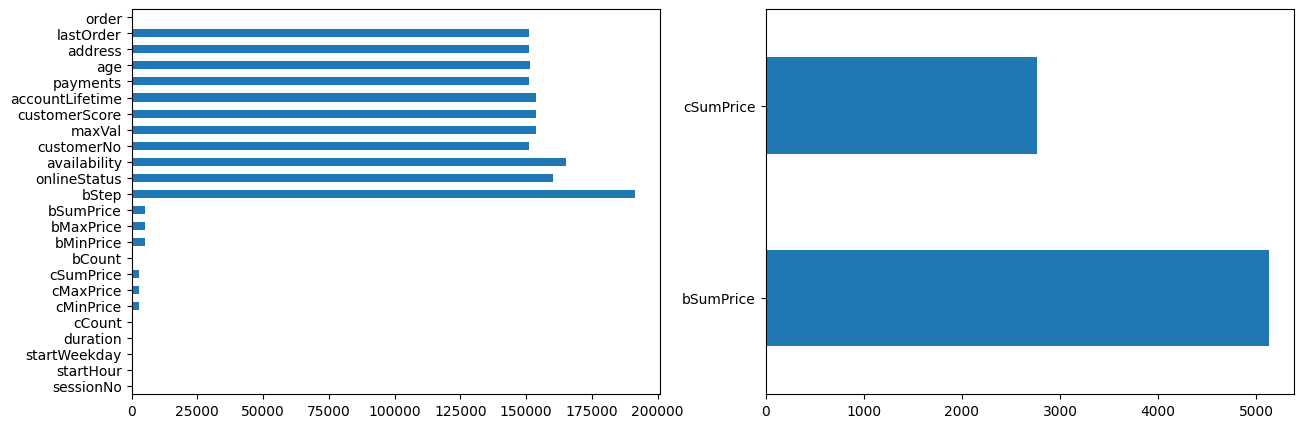

In [372]:
NULLs = data_train.isnull().sum()
if NULLs.sum() == 0:
    print('Dataset tidak memiliki nilai NULL/NaN.')
else:
    print('Dataset memiliki nilai NULL/NaN:')
    print(NULLs, '\n')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

NULLs.plot(kind = 'barh', ax=axs[0])
NULLs = NULLs[['bSumPrice', 'cSumPrice']]
NULLs.plot(kind = 'barh', ax=axs[1])

plt.show()

Berdasarkan grafik di atas, hasil pengecekan menunjukkan bahwa jumlah nilai NULL pada atribut mulai dari `lastOrder` hingga `customerNo` relatif sama. Berdasarkan analisis kami, hasil ini menunjukkan bahwa atribut-atribut tersebut mewakili informasi customer. Banyaknya nilai NULL pada informasi customer tersebut mungkin menunjukkan bahwa sejumlah customer adalah customer baru. Sementara itu, atribut dari bSumPrice hingga bMinPrice memiliki jumlah nilai NULL yang lebih besar dibandingkan dengan atribut cSumPrice hingga cMinPrice. Hal ini mungkin menunjukkan bahwa banyak customer cenderung meng-klik barang dan langsung membelinya tanpa memasukkan barang tersebut ke dalam keranjang terlebih dahulu.

### Mencari Korelasi Atribut

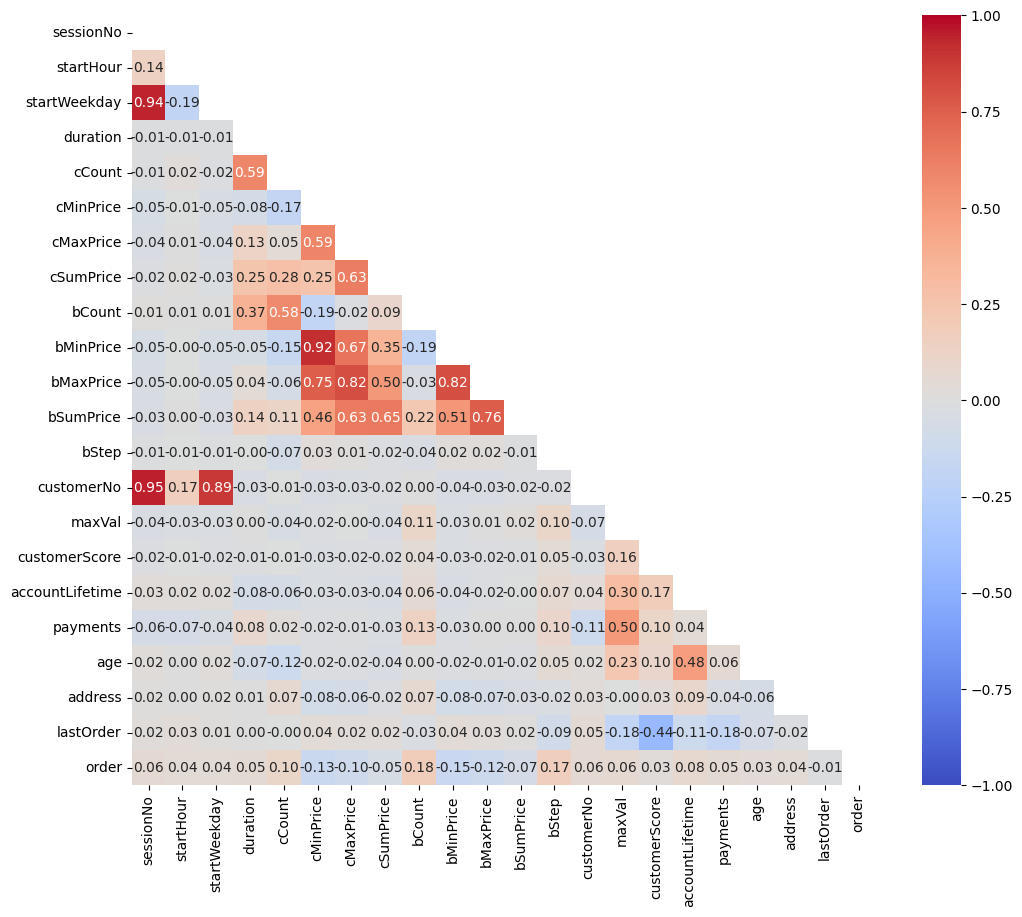

In [373]:
# pilih kolom data numerik
features = data_train.select_dtypes(include=np.number)

# hitung korelasi antar kolom
corrMatrix = features.corr()

# buat heatmap berdasarkan matriks korelasi
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

sns.heatmap(corrMatrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

Korelasi diatas menggunakan data_train alias data keseluruhan

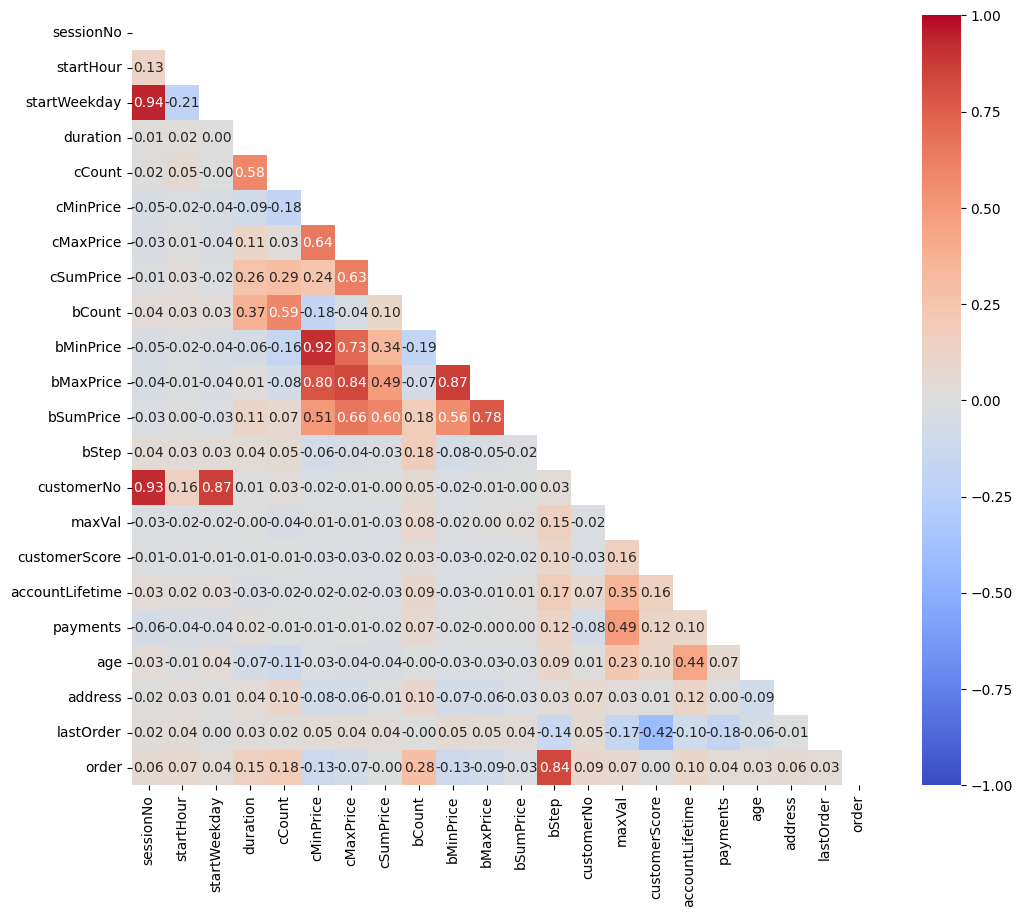

In [374]:
# pilih kolom data numerik
features = Xtrain.select_dtypes(include=np.number)

# hitung korelasi antar kolom
corrMatrix = features.corr()

# buat heatmap berdasarkan matriks korelasi
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

sns.heatmap(corrMatrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

Korelasi diatas menggunakan data Xtrain alias data yang berdasarkan data terakhir pada sesi yang sama.

Bia dilihat jika berdasarkan data terakhir pada setiap sesi bStep menjadi atribut yang berkorelasi tertinggi dengan order

### Missing Value & Drop Attribute Handling

In [375]:
# ganti nilai NULL pada bStep menjadi 5 jira melakukan order
Xtrain.loc[(Xtrain['bStep'].isnull()) & (Xtrain['order'] == 1), 'bStep'] = 5

# jika tidak melakukan order, distribusi nilai null ke 4 kategori bStep lainnya
order_0_indices = Xtrain[(Xtrain['bStep'].isnull()) & (Xtrain['order'] == 0)].index
bStep_values = [1, 2, 3, 4] * (len(order_0_indices) // 4 + 1)
for i, index in enumerate(order_0_indices):
    Xtrain.loc[index, 'bStep'] = bStep_values[i]

In [376]:
Xtrain.loc[:, ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice']] = \
Xtrain.loc[:, ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice']].fillna(0)

Jika bStep bernilai null dan order bernilai 'y' (beli), nilai bStep diisi dengan 5 untuk mencerminkan bahwa transaksi telah selesai. Selanjutnya, jika bStep bernilai null dan order bernilai 'n' (tidak beli), nilai bStep diisi secara berurutan dengan nilai 1 hingga 4 agar distribusi data tidak bias pada nilai tertentu, sekaligus merepresentasikan tahap-tahap awal proses pembelian yang tidak terselesaikan. Terakhir, jika atribut cMinPrice, cMaxPrice, cSumPrice, bMinPrice, bMaxPrice, dan bSumPrice bernilai null, nilai tersebut diisi dengan 0. Hal ini dilakukan dengan asumsi bahwa data bernilai null karena pelanggan tidak melakukan klik barang atau tidak memasukkan barang ke dalam keranjang.

In [377]:
Xtrain = Xtrain.drop(['onlineStatus', 'availability'], axis=1)

Dari analisis kami, kolom onlineStatus dan availability tampaknya memang tidak terlalu berpengaruh dalam memprediksi apakah pelanggan akan melakukan pembelian atau tidak. Untuk bisa membeli, pelanggan tentu harus dalam keadaan online (onlineStatus = Y). Jadi, kalau statusnya N (offline), sudah pasti pelanggan tidak akan membeli. Namun, meskipun statusnya Y (online), belum tentu mereka akan melakukan pembelian karena bisa saja hanya melihat-lihat saja. Karena itu, onlineStatus tidak benar-benar membantu dalam memprediksi pembelian. Begitu pula dengan availability, yang sepertinya tidak memiliki dampak langsung pada keputusan membeli. Oleh sebab itu, kedua kolom ini bisa dihapus dari dataset (Xtrain) tanpa mempengaruhi akurasi prediksi.

### Cek Perbandingan Jumlah Data Pembeli

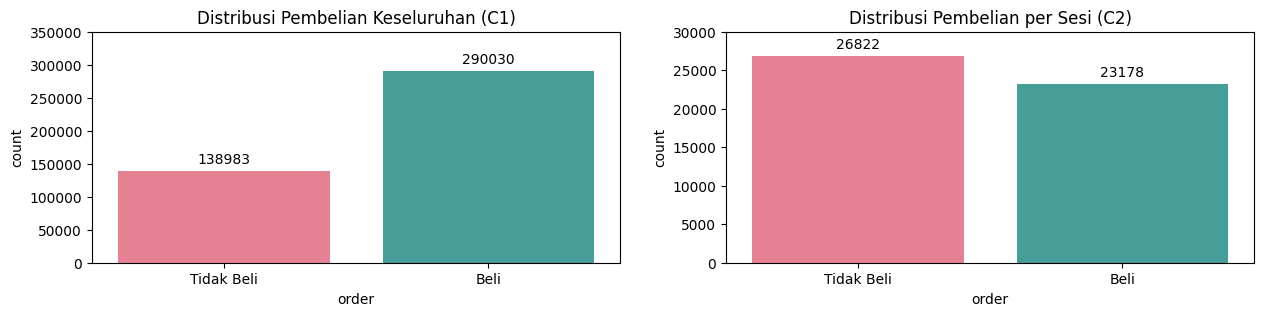

In [378]:
# buat subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

# hitung jumlah data yang melakukan pembelian dan tidak secara keseluruhan data
orderCounts = data_train.loc[:, 'order'].value_counts()

# countplot
sns.countplot(x='order', data=data_train, hue='order', palette='husl', ax=axs[0])

# berikan keterangan setiap bar
for p in axs[0].patches:
    axs[0].annotate(f'\n{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# customize plot 1
axs[0].set_title('Distribusi Pembelian Keseluruhan (C1)')
axs[0].set_xticks([0, 1], ['Tidak Beli', 'Beli'], rotation = 0)
axs[0].set_ylim(0, 350000)
axs[0].legend().set_visible(False)

# --------------------------------------------------------------------------------------------------------------------

# hitung jumlah data yang melakukan pembelian dan tidak per sesi
orderCounts = Xtrain.loc[:, 'order'].value_counts()

# countplot
sns.countplot(x='order', data=Xtrain, hue='order', palette='husl', ax=axs[1])

# berikan keterangan setiap bar
for p in axs[1].patches:
    axs[1].annotate(f'\n{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None
# cutomize plot 2
axs[1].set_title('Distribusi Pembelian per Sesi (C2)')
axs[1].set_xticks([0, 1], ['Tidak Beli', 'Beli'], rotation = 0)
axs[1].set_ylim(0, 30000)
axs[1].legend().set_visible(False)

# tampilkan plot
plt.show()

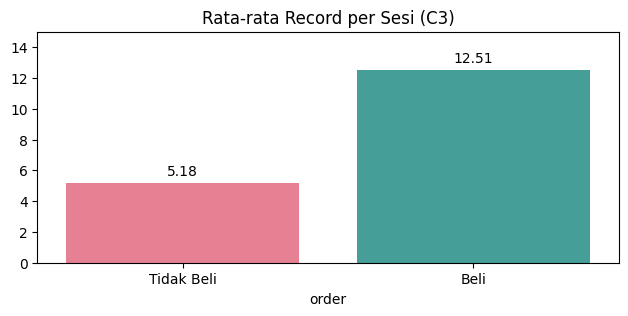

In [379]:
# hitung pembelian berdasarkan record sesi rata rata
sessionCounts = data_train.groupby(['sessionNo', 'order'])['sessionNo'].count().groupby('order').mean()

# barplot
plt.figure(figsize = (7.5, 3))
sns.barplot(x=sessionCounts.index, y=sessionCounts.values, hue=sessionCounts.index, palette='husl')

# berikan keterangan setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# tampilkan plot
plt.title('Rata-rata Record per Sesi (C3)')
plt.xticks([0, 1], ['Tidak Beli', 'Beli'])
plt.ylim(0, 15)
plt.legend().set_visible(False)
plt.show()

Grafik jumlah data pembelian secara keseluruhan (C1) menunjukkan bahwa record "beli" jauh lebih banyak dibandingkan dengan record "tidak beli". Namun, grafik jumlah data pembelian per sesi (C2) menunjukkan hasil yang berlawanan (meskipun perbedaan jumlah record tidak terlalu signifikan). Hal ini disebabkan oleh rata-rata jumlah record per sesi (C3) "beli" lebih tinggi, yaitu ~12 record per sesi, dibandingkan dengan jumlah record per sesi "tidak beli", yaitu ~5 record per sesi.

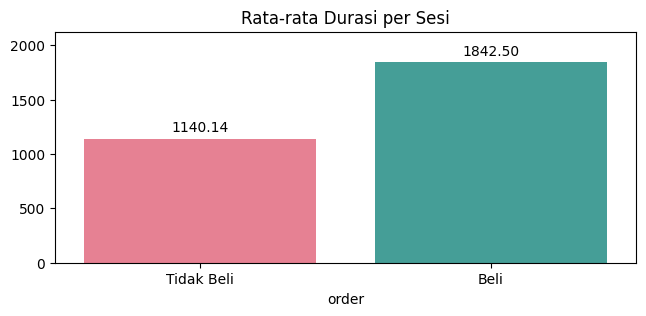

In [380]:
# hitung perbandingan pembelian berdasarkan rata rata durasi setiap sesi
durationAVG = Xtrain.groupby('order')['duration'].mean()

# barplot
plt.figure(figsize = (7.5, 3))
sns.barplot(x=durationAVG.index, y=durationAVG.values, hue=durationAVG.index, palette='husl')

# berikan keterangan setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# tampilkan plot
plt.title('Rata-rata Durasi per Sesi')
plt.xticks([0, 1], ['Tidak Beli', 'Beli'], rotation = 0)
plt.ylim(0, 2125)
plt.legend().set_visible(False)
plt.show()

Pada plot ini menunjukkan rata-rata durasi yang dihabiskan per sesi dalam detik, dibedakan antara sesi dengan pembelian dan tanpa pembelian. Rata-rata durasi untuk sesi tanpa pembelian adalah 1140.14 detik, sedangkan untuk sesi dengan pembelian rata-ratanya adalah 1842.50 detik. Perbedaan ini cukup terlihat, menunjukkan bahwa sesi yang berakhir dengan pembelian cenderung memiliki durasi yang lebih lama dibandingkan dengan sesi tanpa pembelian. Dari hasil ini, bisa disimpulkan bahwa semakin lama waktu yang dihabiskan dalam sesi, semakin besar kemungkinan pengguna melakukan pembelian.

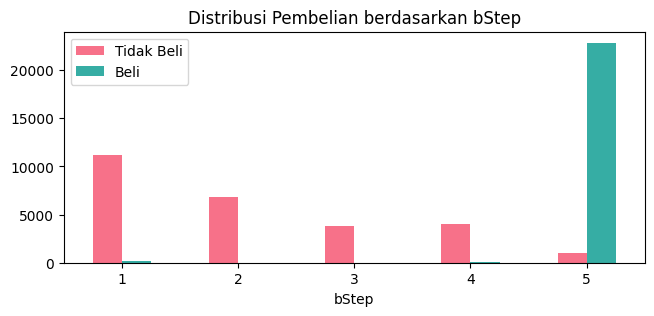

In [381]:
# hitung banyak persebaran pembelian berdasarkan bStep
bStepCount = Xtrain.groupby(['bStep', 'order'])['order'].count().unstack()

# barplot
color = sns.color_palette("husl", n_colors=len(bStepCount.columns))
bStepCount.plot(kind='bar', stacked=False, figsize=(7.5, 3), color=color)

# tampilkan plot
plt.title('Distribusi Pembelian berdasarkan bStep')
plt.xlabel('bStep')
plt.xticks(bStepCount.index - 1, [1, 2, 3, 4, 5], rotation=0)
plt.legend(labels=['Tidak Beli', 'Beli'])
plt.show()

Berdasarkan grafik distribusi pembelian berdasarkan nilai `bStep`, terlihat bahwa ketika atribut `order` bernilai 'y' (beli), `bStep` cenderung memiliki nilai 5. Sebaliknya, nilai `bStep` 1 hingga 4 didominasi oleh atribut `order` bernilai 'n' (tidak beli), dengan jumlah tertinggi pada `bStep` bernilai 1. Minimnya jumlah atribut `order` bernilai 'y' (beli) pada `bStep` dengan nilai 1-4 merupakan anomali yang mungkin disebabkan oleh banyak pelanggan yang hanya melihat atau memulai proses pembelian tetapi tidak melanjutkan hingga selesai. Di sisi lain, tingginya konsistensi `bStep` bernilai 5 untuk pembelian yang berhasil menunjukkan bahwa hanya pelanggan yang mencapai tahap akhir transaksi yang benar-benar melakukan pembelian.

### Mencari Distribusi Sesi berdasarkan Waktu

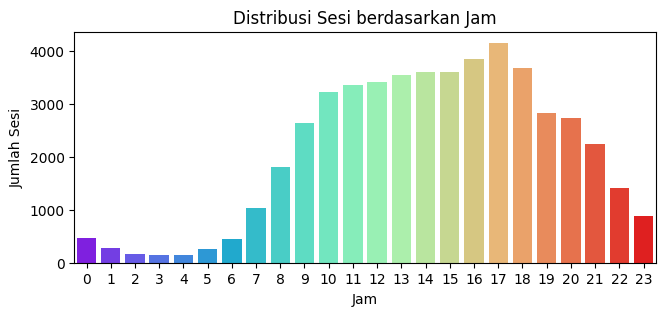

In [382]:
# countplot distribusi jam sesi
plt.figure(figsize=(7.5, 3))
sns.countplot(x='startHour', data=Xtrain, hue='startHour', palette='rainbow')

# tampilkan plot
plt.title('Distribusi Sesi berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sesi')
plt.legend().set_visible(False)
plt.show()

Berdasarkan plot diatas bisa dilihat bahwa 3 jam yang memiliki sesi terbanyak atau jam sibuk/padat berada di jam 16 sampai 18, bisa kita asumsikan bahwa jam-jam tersebut adalah jam pulang kerja. Jam sibuk/padat mulai naik di jam 6 hingga 9 lalu menjadi cukup stabil dari jam 10 hingga 18, dan mulai turun dari jam 19

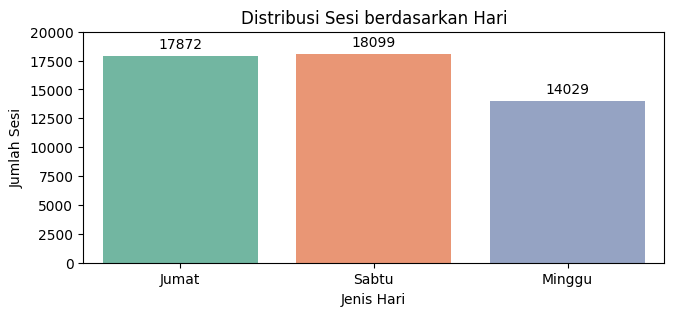

In [383]:
# hitung distribusi sesi berdasarkan hari
sessionDIST = Xtrain.groupby('startWeekday')['sessionNo'].count()

# barplot
plt.figure(figsize=(7.5, 3))
sns.barplot(x=sessionDIST.index, y=sessionDIST.values, hue=sessionDIST.index, palette='Set2')

# berikan keterangan pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# tampilkan plot
plt.title('Distribusi Sesi berdasarkan Hari')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Sesi')
plt.xticks([0, 1, 2], ['Jumat', 'Sabtu', 'Minggu'])
plt.ylim(0, 20000)
plt.legend().set_visible(False)
plt.show()

Berdasarkan plot diatas, bisa kita dapatkan informasi mengenai hari dengan sesi terbanyak alias hari tersibuk yaitu hari Sabtu dan hari Jum'at kedua tersibuk dengan jumlah sesi yang tidak begitu jauh. Untuk hari Minggu, adalah hari dengan sesi paling sedikit dibanding dua hari lainnya.

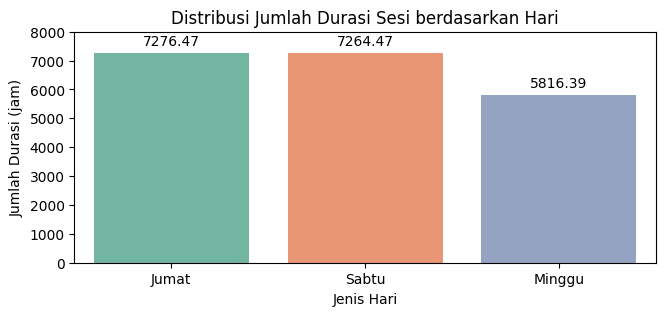

In [384]:
# hitung jumlah durasi dalam jam berdasarkan hari
durationSUM = Xtrain.groupby('startWeekday')['duration'].sum() / 3600

# barplot
plt.figure(figsize=(7.5, 3))
sns.barplot(x=durationSUM.index, y=durationSUM.values, hue=durationSUM.index, palette='Set2')

# berikan keterangan pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# tampilkan plot
plt.title('Distribusi Jumlah Durasi Sesi berdasarkan Hari')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Durasi (jam)')
plt.ylim(0, 8000)
plt.xticks([0, 1, 2], ['Jumat', 'Sabtu', 'Minggu'])
plt.legend().set_visible(False)
plt.show()

Pada plot ini menunjukkan total durasi sesi yang dihabiskan pengguna berdasarkan hari. Durasi dari sesi terakhir setiap hari dijumlahkan, lalu ditampilkan dalam jam di sumbu y. Terlihat bahwa pengguna menghabiskan waktu yang hampir sama pada hari Jumat dan Sabtu, masing-masing sekitar 7276 dan 7264 jam. Namun, pada hari Minggu, durasi sesi berkurang cukup banyak menjadi sekitar 5816 jam. Ini mungkin menunjukkan bahwa aktivitas atau kebiasaan pengguna berubah di hari Minggu, dengan lebih sedikit waktu yang dihabiskan dibandingkan dengan Jumat dan Sabtu.

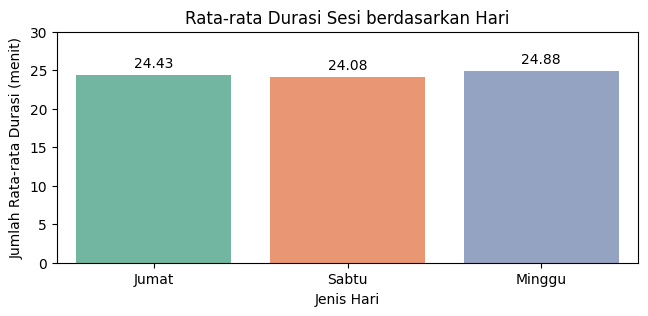

In [385]:
# hitung rata rata durasi per hari
minuteSpent = durationSUM / sessionDIST * 60

# barplot
plt.figure(figsize=(7.5, 3))
sns.barplot(x=minuteSpent.index, y=minuteSpent.values, hue=minuteSpent.index, palette='Set2')

# berikan keterangan setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='top', xytext=(0, 25), textcoords='offset points') if p.get_height() > 0 else None

# tampilkan plot
plt.title('Rata-rata Durasi Sesi berdasarkan Hari')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Rata-rata Durasi (menit)')
plt.ylim(0, 30)
plt.xticks([0, 1, 2], ['Jumat', 'Sabtu', 'Minggu'])
plt.legend().set_visible(False)
plt.show()

Pada plot ini menunjukkan rata-rata durasi sesi yang dihabiskan pengguna berdasarkan hari. Durasi sesi rata-rata ditampilkan dalam menit di sumbu y. Terlihat bahwa pengguna memiliki rata-rata durasi yang  konsisten pada hari Jumat dan Sabtu, masing-masing sekitar 24.43 dan 24.08 menit. Namun, pada hari Minggu, rata-rata durasi sesi sedikit meningkat sekitar 24.88 menit. Meskipun perbedaannya kecil, ini memberi gambaran bahwa pengguna mempunyai pola yang cukup konsisten sepanjang akhir pekan, khususnya di hari Minggu.

### Membagi Dataset menjadi New & Old Customer

In [386]:
old_train = Xtrain[Xtrain['customerNo'].notnull()]
new_train = Xtrain[Xtrain['customerNo'].isnull()]

In [387]:
print(f"Jumlah data akun lama : {len(old_train)}")
print(f"Jumlah data akun baru : {len(new_train)}")

Jumlah data akun lama : 27361
Jumlah data akun baru : 22639


Berdasarkan hasil diatas data transact_train.txt bisa dibagi menjadi dua kelompok, yaitu 27,361 data untuk kategori 'old' alias pengguna lama dan 22,639 data untuk kategori 'new' pengguna baru. Pemisahan ini memudahkan kita untuk menganalisis kedua kelompok secara terpisah, misalnya untuk melihat perbedaan perilaku antara pengguna lama dan pengguna baru.

In [388]:
old_train.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,0
cMaxPrice,0
cSumPrice,0
bCount,0
bMinPrice,0


In [389]:
# drop atribut tidak penting
new_train = new_train.drop(['customerNo', 'maxVal', 'customerScore', 'accountLifetime',
                            'payments', 'age', 'address', 'lastOrder'], axis=1)
new_train.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,0
cMaxPrice,0
cSumPrice,0
bCount,0
bMinPrice,0


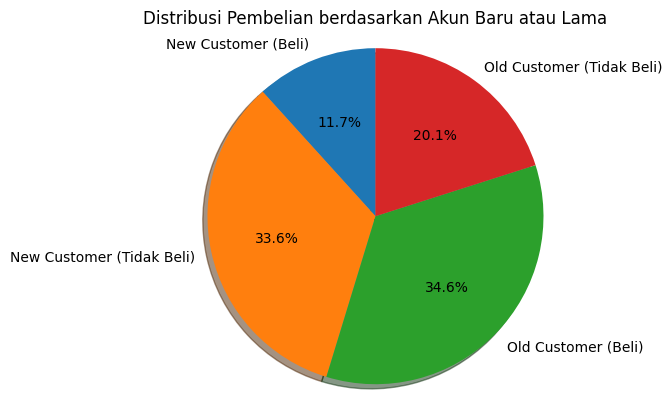

New Customer (Beli)       : 5858
New Customer (Tidak Beli) : 16781
Old Customer (Beli)       : 17320
Old Customer (Tidak Beli) : 10041


In [390]:
# labeli 4 jenis customer
labels = ['New Customer (Beli)', 'New Customer (Tidak Beli)', 'Old Customer (Beli)', 'Old Customer (Tidak Beli)']

# inisialisasi variabel customer
new_train_y = len(new_train[new_train['order'] == 1])
new_train_n = len(new_train[new_train['order'] == 0])
old_train_y = len(old_train[old_train['order'] == 1])
old_train_n = len(old_train[old_train['order'] == 0])

sizes = [new_train_y, new_train_n, old_train_y, old_train_n]
explode = (0, 0, 0, 0)

# pieplot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

# tampilkan plot
plt.title('Distribusi Pembelian berdasarkan Akun Baru atau Lama')
plt.show()


# tampilkan nilai masing masing customer
print(f"New Customer (Beli)       : {new_train_y}")
print(f"New Customer (Tidak Beli) : {new_train_n}")
print(f"Old Customer (Beli)       : {old_train_y}")
print(f"Old Customer (Tidak Beli) : {old_train_n}")

Pada plot ini menunjukkan perbedaan kecenderungan pembelian antara pelanggan baru dan pelanggan lama. Dari sini terlihat bahwa pelanggan baru cenderung lebih banyak yang tidak melakukan pembelian dengan persentase 33.6% dan hanya 11.7% yang membeli. Sebaliknya, pelanggan lama justru lebih banyak yang melakukan pembelian, yaitu sebesar 34.6% dibandingkan dengan yang tidak membeli sebesar  20.1%. Hal ini menunjukkan bahwa pelanggan lama lebih mungkin melakukan pembelian, mungkin karena mereka sudah lebih percaya pada platform, lebih memahami produk, atau sudah terbiasa berbelanja di sana. Sementara itu, pelanggan baru tampaknya masih berada pada tahap mencoba-coba, sehingga belum terlalu banyak yang melakukan pembelian. Informasi ini bisa jadi acuan untuk strategi pemasaran, misalnya dengan memberikan penawaran khusus untuk menarik minat pelanggan baru agar lebih tertarik membeli.

## **Machine Learning Modelling**

### Import Library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Hitung Akurasi Model ML

In [391]:
# drop atribut
Xtrain_new = Xtrain.drop(['customerNo', 'maxVal', 'customerScore', 'accountLifetime',
                            'payments', 'age', 'address', 'lastOrder'], axis=1)
y = Xtrain_new['order']
X = Xtrain_new.drop('order', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {'RF': RandomForestClassifier(), 'XGB': XGBClassifier(), 'NB': GaussianNB()}

performance = []

for name, model in models.items():
    df_dict = {}
    classifier = model.fit(X_train, y_train)
    predicted  = classifier.predict(X_test)
    print(f'\n{name} CLASSIFIER')
    print("accuracy score  = ".title(), accuracy_score(predicted, y_test))
    df_dict['Accuracy'] = accuracy_score(predicted, y_test)

    print("Precision score = ".title(), precision_score(predicted, y_test))
    df_dict['Precision'] = precision_score(predicted, y_test)

    print("recall score    = ".title(), recall_score(predicted, y_test))
    df_dict['Recall'] = recall_score(predicted, y_test)

    print("f1_score        = ".title(), f1_score(predicted, y_test))
    df_dict['F1'] = f1_score(predicted, y_test)
    performance.append(pd.DataFrame(df_dict, index = [name]))


RF CLASSIFIER
Accuracy Score  =  0.9876
Precision Score =  0.9855478861087144
Recall Score    =  0.9876783398184177
F1_Score        =  0.9866119628589938

XGB CLASSIFIER
Accuracy Score  =  0.987
Precision Score =  0.9855478861087144
Recall Score    =  0.9863989637305699
F1_Score        =  0.9859732412602503

NB CLASSIFIER
Accuracy Score  =  0.8752
Precision Score =  0.931190681622088
Recall Score    =  0.8229126953869615
F1_Score        =  0.8737097753491196


In [392]:
pd.concat(performance)

,Accuracy,Precision,Recall,F1
RF,0.9876,0.985548,0.987678,0.986612
XGB,0.9870,0.985548,0.986399,0.985973
NB,0.8752,0.931191,0.822913,0.873710


In [398]:
# predict _class with RF trained
_class_new = _class.drop(['onlineStatus', 'availability', 'customerNo', 'maxVal', 'customerScore', 'accountLifetime',
                          'payments', 'age', 'address', 'lastOrder'], axis=1)
X_pred = _class_new
_class['order'] = RandomForestClassifier().fit(X_train, y_train).predict(X_pred)

In [410]:
Xclass = _class.groupby('sessionNo').tail(1)
Xclass_res = Xclass[['sessionNo', 'order']].reset_index(drop=True)
Xclass_res

,sessionNo,order
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0
...,...,...
5106,5107,0
5107,5108,0
5108,5109,1
5109,5110,0


In [411]:
from google.colab import drive
drive.mount('/content/drive')
!rm ./Data.ipynb
!rm ./Data.html
!cp "/content/drive/MyDrive/Colab Notebooks/Data.ipynb" ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [412]:
!jupyter nbconvert --to html "Data.ipynb"

[NbConvertApp] Converting notebook Data.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1234918 bytes to Data.html
